In [15]:
import pandas as pd
data_path=path="../data/demo_data/metric/metrics_100.csv"
metric_data_df=pd.read_csv(data_path)
train_data=metric_data_df.values.T[1:]

In [22]:
# 先取30条时间序列作poc
columns=[str(i) for i in range(30)]
metric_data_df=metric_data_df[columns]
X_train=metric_data_df.values.T[1:]

In [26]:
import numpy
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans

seed = 0
numpy.random.seed(seed)
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(X_train)

Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    0.0s finished


3.675 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.920 --> 0.920 --> 
Init 2


[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    0.0s finished


3.439 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    0.0s finished


0.839 --> 0.839 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    0.0s finished


In [39]:
cluster=dict()
cluster[0]=[]
cluster[1]=[]
cluster[2]=[]
for res in zip([i for i in range(30)],y_pred):
    cluster[res[1]].append(res[0])
for k in cluster:
    print("类别{}中包含的metric为：{}".format(k,cluster[k]))

类别0中包含的metric为：[3, 6, 7, 14, 23]
类别1中包含的metric为：[1, 2, 4, 5, 8, 9, 10, 11, 12, 13, 15, 17, 18, 19, 20, 21, 25, 26, 28]
类别2中包含的metric为：[0, 16, 22, 24, 27]


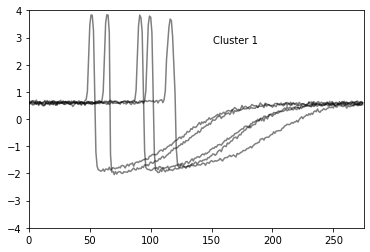

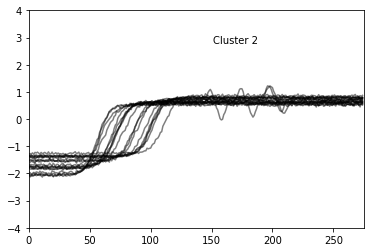

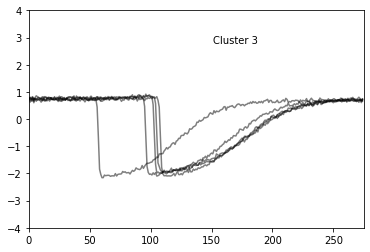

In [30]:
for yi in range(3):
    plt.figure()
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.5)
    plt.xlim(0, X_train.shape[1])
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")